In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# Load the CSV file
df = pd.read_csv('twitter_training.csv', encoding='latin1', header=None)

# Add column names
# Add correct column names for all 4 columns
df.columns = ['id', 'entity', 'sentiment', 'content']

# Preview the first few rows
df.head()



,id,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


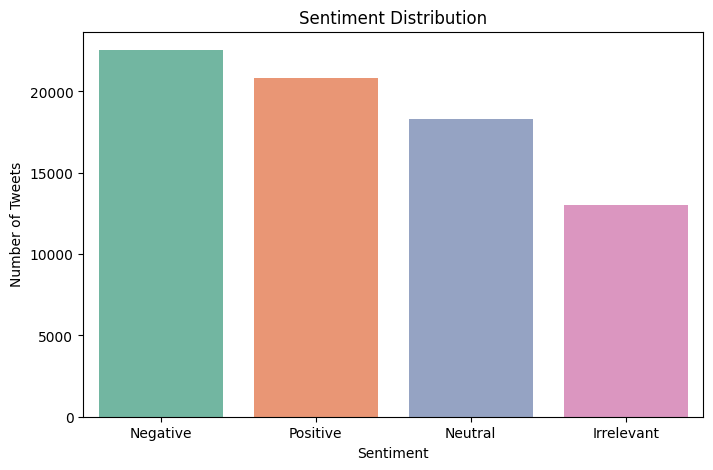

In [6]:
# Create a DataFrame for plotting
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['sentiment', 'count']

# Plot using hue to avoid warning
plt.figure(figsize=(8, 5))
sns.barplot(data=sentiment_df, x='sentiment', y='count', hue='sentiment', palette='Set2', legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


<Figure size 1000x600 with 0 Axes>

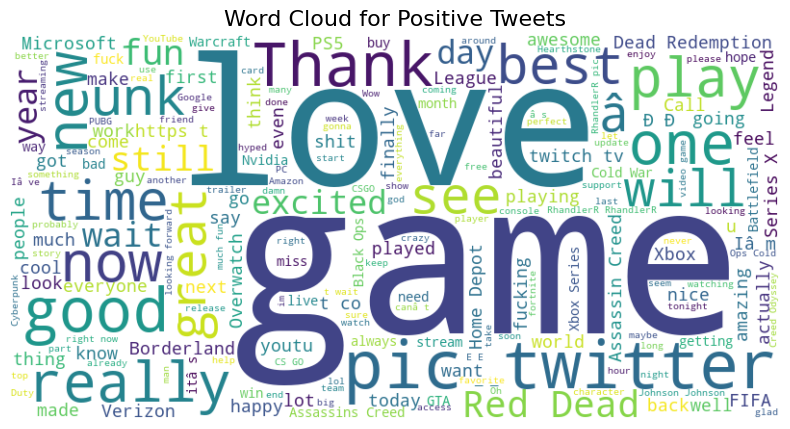

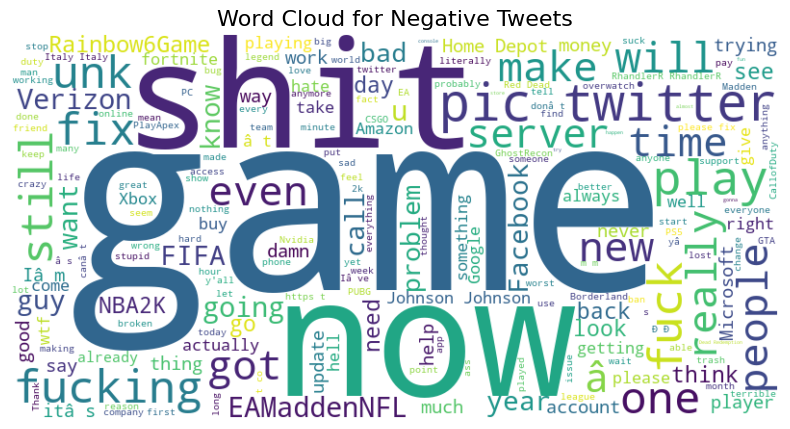

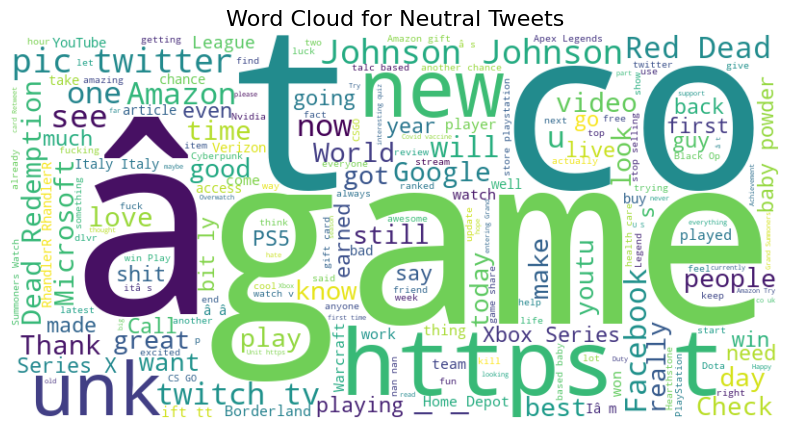

In [7]:
from wordcloud import WordCloud

# Set figure size
plt.figure(figsize=(10, 6))

# Loop through each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    # Join all tweet texts of the current sentiment
    text = " ".join(df[df['sentiment'] == sentiment]['content'].astype(str))

    # Generate the word cloud
    wc = WordCloud(
        width=800, height=400,
        background_color='white',
        max_words=200,
        contour_width=3,
        contour_color='steelblue'
    )

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wc.generate(text), interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Tweets", fontsize=16)
    plt.show()


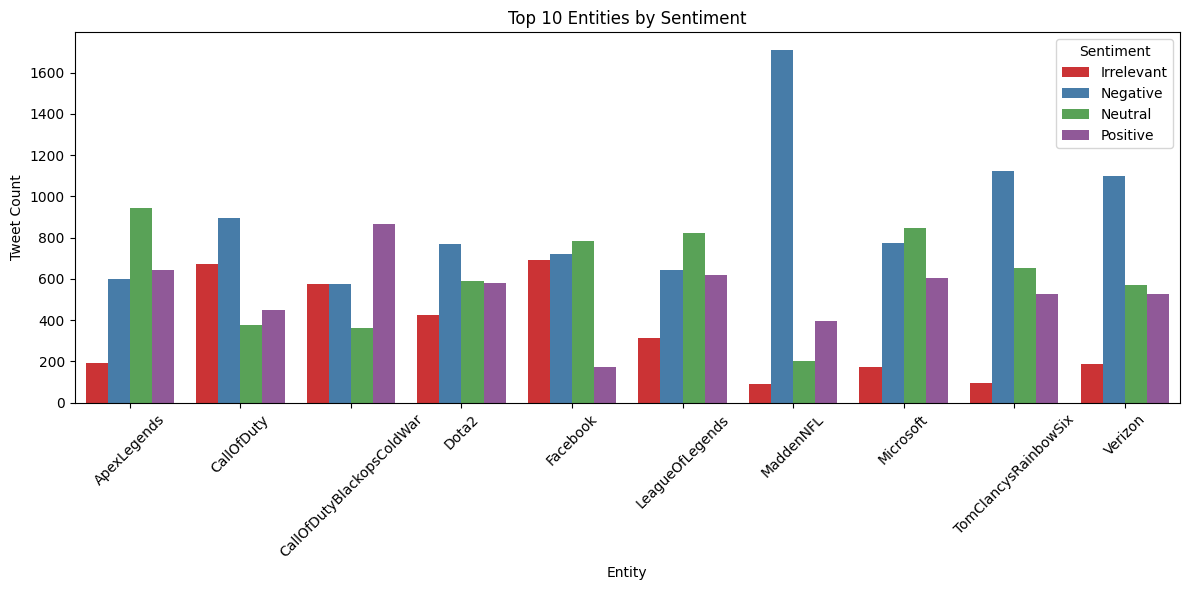

In [8]:
# Group by entity and sentiment, and count occurrences
entity_sentiment_counts = df.groupby(['entity', 'sentiment']).size().reset_index(name='count')

# Get top 10 most mentioned entities (across all sentiments)
top_entities = entity_sentiment_counts.groupby('entity')['count'].sum().nlargest(10).index

# Filter only top entities
filtered_data = entity_sentiment_counts[entity_sentiment_counts['entity'].isin(top_entities)]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='entity', y='count', hue='sentiment', palette='Set1')
plt.title("Top 10 Entities by Sentiment")
plt.xlabel("Entity")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


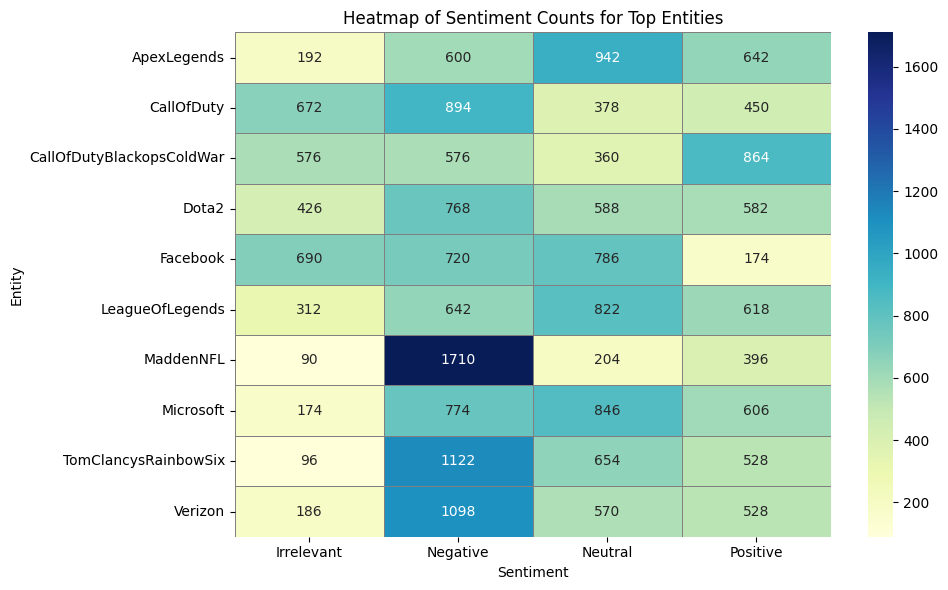

In [9]:
# Pivot table for heatmap
heatmap_data = filtered_data.pivot(index='entity', columns='sentiment', values='count').fillna(0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5, linecolor='gray')
plt.title('Heatmap of Sentiment Counts for Top Entities')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()
